# Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## Condiciones:

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## Descripción de datos

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

- geo_data_0.csv. 
- geo_data_1.csv. 
- geo_data_2.csv. 
- id — identificador único de pozo de petróleo
- f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- product — volumen de reservas en el pozo de petróleo (miles de barriles).

## Instrucciones del proyecto

1. Descarga y prepara los datos. Explica el procedimiento.
2. Entrena y prueba el modelo para cada región en geo_data_0.csv:

    1. Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

    2. Entrena el modelo y haz predicciones para el conjunto de validación.

    3. Guarda las predicciones y las respuestas correctas para el conjunto de validación.

    4. Muestra el volumen medio de reservas predicho y RMSE del modelo.

    5. Analiza los resultados.

    6. Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.

3. Prepárate para el cálculo de ganancias:

    1. Almacena todos los valores necesarios para los cálculos en variables separadas.

    2. Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

    3. Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

4. Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones:

    1. Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

    2. Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.

    3. Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

5. Calcula riesgos y ganancias para cada región:

    1. Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios.

    2. Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

    3. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?

# Librerías

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pprint import pprint
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle
import re
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import joblib

# Carga de datos

In [61]:
data_1 = pd.read_csv('datasets/geo_data_0.csv')
data_2 = pd.read_csv('datasets/geo_data_1.csv')
data_3 = pd.read_csv('datasets/geo_data_2.csv')

In [62]:
data_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [63]:
data_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [64]:
data_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [65]:
datasets=[data_1,data_2,data_3]
for i in datasets:
    print(i.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

Podemos identificar que los datos son netamente numéricos a excepción del contrato que identifica el pozo de petróleo y que no tenemos datos ausentes. Los tipos de datos están bien, por lo que vamos a dejarlos tal como están.

# Describe

In [66]:
datasets=[data_1,data_2,data_3]
for i in datasets:
    print(i.describe())
    print()

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%      

Las estadísticas descriptivas de las variables f0, f1, y f2 no nos dicen nada, sin embargo, podemos ver el volumen medio de reservas de petroleo de cada región, en la región 1 es de 92.5 miles de barriles, para la region 2 es 68.82 miles de barriles y para la region 3 es de 95 mil barriles.

# Limpieza de datos

In [67]:
#Calculamos los ausentes
for i in range(0,3):
    print(f'Ausentes región {i+1}:\n{datasets[i].isna().sum()}')


Ausentes región 1:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Ausentes región 2:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
Ausentes región 3:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [68]:
#Calculamos los pozos con valores negativos
for i in range(0,3):
    print(f'Pozos con reservas negativas de la región {i+1}: \n',datasets[i][datasets[i]['product']<0]['product'].count())


Pozos con reservas negativas de la región 1: 
 0
Pozos con reservas negativas de la región 2: 
 0
Pozos con reservas negativas de la región 3: 
 0


No tenemos pozos con valores negativos, lo cual está bien.

In [69]:
#Calculamos los pozos con valores cero
for i in range(0,3):
    print(f'Pozos con 0 reservas de la región {i+1}: \n',datasets[i][datasets[i]['product']==0]['product'].count())


Pozos con 0 reservas de la región 1: 
 1
Pozos con 0 reservas de la región 2: 
 8235
Pozos con 0 reservas de la región 3: 
 1


Podemos ver la cantidad de pozos que tienen 0 barriles de petroleo es de solo 1 en la región uno, 8235 en la región 2 y 1 en la región 3. Esto nos indica que los datos de la región 2 tienen más pozos sin reservas y podría significar una baja rentabilidad. Esto lo veremos posteriormente.

In [70]:
#Calculamos los pozos con valores negativos
for i in range(0,3):
    print(f'Proporción de la región {i+1}: \n',100*datasets[i][datasets[i]['product']==0]['product'].count()/data_1.shape[0])


Proporción de la región 1: 
 0.001
Proporción de la región 2: 
 8.235
Proporción de la región 3: 
 0.001


El porcentaje medianamente significativo es el 8% de la región 2.

In [71]:
for i in range(0,3):
    print(f'Duplicados de la región {i+1}: \n',datasets[i].duplicated().sum())

Duplicados de la región 1: 
 0
Duplicados de la región 2: 
 0
Duplicados de la región 3: 
 0


No tenemos valores duplicados o pozos duplicados, por lo que podemos proseguir con nuestro algoritmo.

# Análisis

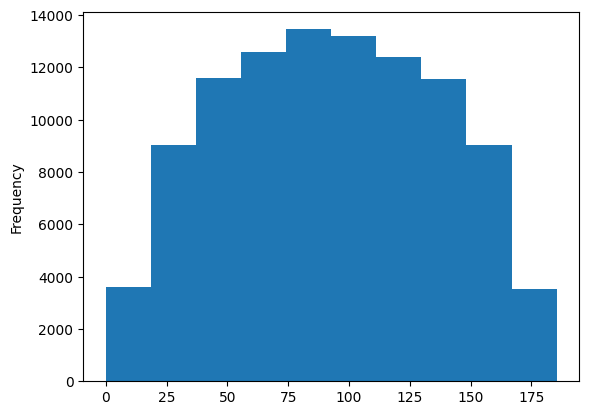

In [72]:
plt_1=data_1['product'].plot(kind='hist')

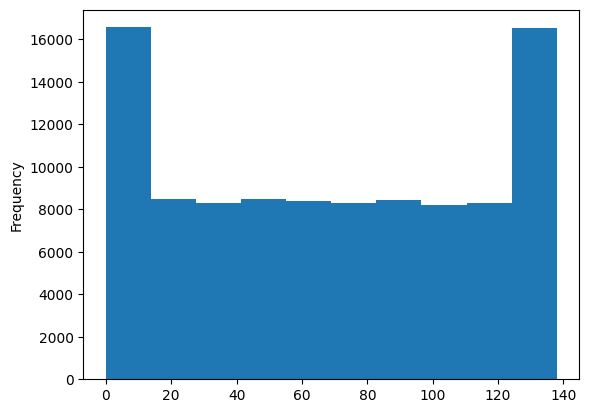

In [73]:
plt_2=data_2['product'].plot(kind='hist')

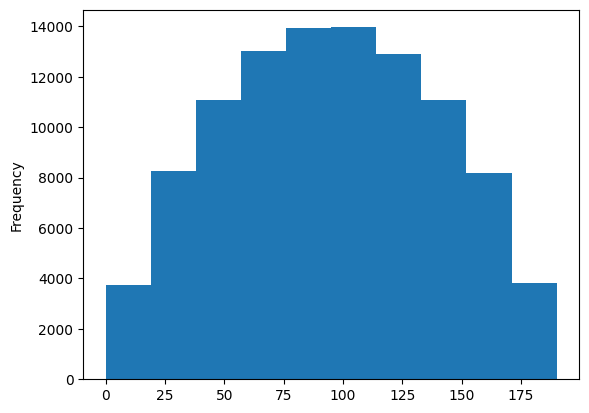

In [74]:
plt_3=data_3['product'].plot(kind='hist')

Podemos ver el comportamiento de las variables de producto de cada región en los histogramas presentados, donde podemos ver que la región 1 y la región 3 tienen distribuciones normales que tienden a la media, por el contrario la región 2 es bimodal, teniendo 2 picos, los datos tienden a 0 y al maximo que tiende a 140, lo cual es un comportamiento extraño que puede generar inconsistencias en el momento de elegir la región más rentable.

# Entrenamiento de la región 1

## División de los datos

In [75]:
seed=12345
features=data_1.drop(['id','product'],axis=1)
target=data_1['product']
features_train, features_valid,target_train,target_valid_1 = train_test_split(features,target,test_size=0.25,random_state=seed)

## Entrenamiento del modelo

In [76]:
# Hacemos la grilla de parametros
fit_intercept = [True, False]
copy_X = [True, False]
n_jobs= [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
positive=[True, False]
# Creación de la malla aleatoria
random_grid = {'fit_intercept': fit_intercept,
               'copy_X': copy_X,
               'n_jobs': n_jobs,
               'positive': positive}
pprint(random_grid)

{'copy_X': [True, False],
 'fit_intercept': [True, False],
 'n_jobs': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'positive': [True, False]}


In [77]:
#Aplicamos el modelo de regresión lineal
model = LinearRegression()
#Aplicamos RandomizedSearchCV para idenfiricar el mejor conjunto de hiperparametros
model_random=RandomizedSearchCV(estimator = model, param_distributions = random_grid,n_iter = 100,cv = 3, verbose = 2,random_state = seed, n_jobs = -1 )
model_random.fit(features_train,target_train)
print(model_random.best_params_)


Fitting 3 folds for each of 80 candidates, totalling 240 fits


c:\Users\Santiago\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'positive': False, 'n_jobs': 200, 'fit_intercept': True, 'copy_X': True}


In [78]:
#Calculamos las métricas del modelo con RandomizedSearchCV
best_predict=model_random.best_estimator_
random_prediction=best_predict.predict(features_valid)
ecm_random=mean_squared_error(target_valid_1,random_prediction)
recm_random=ecm_random**0.5
r2_random=r2_score(target_valid_1,random_prediction)
eam_random=mean_absolute_error(target_valid_1,random_prediction)
print(f'Volumen de reservas medio: {random_prediction.mean()}\nRaiz del error cuadrado medio: {recm_random}\nR2: {r2_random}\nEAM: {eam_random}')


Volumen de reservas medio: 92.59256778438035
Raiz del error cuadrado medio: 37.5794217150813
R2: 0.27994321524487786
EAM: 30.919600777151313


In [79]:
joblib.dump(model_random,'regression_random.joblib')

['regression_random.joblib']

In [80]:
#Entrenamos el modelo sin RandomizedSearchCV y calculamos las métricas
model.fit(features_train,target_train)
pred_valid_1=model.predict(features_valid)
pred_valid_1=pd.Series(pred_valid_1,index=target_valid_1.index)
ecm=mean_squared_error(target_valid_1,pred_valid_1)
recm=ecm**0.5
r2=r2_score(target_valid_1,pred_valid_1)
eam=mean_absolute_error(target_valid_1,pred_valid_1)
print(f'Volumen de reservas medio: {pred_valid_1.mean()}\nRaiz del error cuadrado medio: {recm}\nR2: {r2}\nEAM: {eam}')


Volumen de reservas medio: 92.59256778438035
Raiz del error cuadrado medio: 37.5794217150813
R2: 0.27994321524487786
EAM: 30.919600777151313


In [81]:
joblib.dump(model,'regression_1.joblib')

['regression_1.joblib']

Podemos evidenciar que no hay ninguna diferencia al usar RandomizedSearchCV en la regresión lineal por sus parametros.

In [82]:
#Prueba de cordura
mean_predictions=pd.Series(target_valid_1.mean(),index=target_valid_1.index)
recm_mean=mean_squared_error(target_valid_1,mean_predictions)**0.5
r2_mean=r2_score(target_valid_1,mean_predictions)
eam_mean=mean_absolute_error(target_valid_1,mean_predictions)
print(f'Raiz del error cuadrado medio: {recm_mean}\nR2: {r2_mean}\nEAM: {eam_mean}')

Raiz del error cuadrado medio: 44.28602687855358
R2: 0.0
EAM: 37.67130120321094


Al analizar los resultados, podemos ver que el volumen medio de reservas es de 92.6 mil barriles con un RMSE de 37.57 mil barriles, lo cual es aceptable si lo comparamos con la media, que al predecir los valores obtiene un error mayor correspondiente a 44.28 galones. 
El R2 es de 0.28 lo cual no está mal, sin embargo, podría mejorar y por último el error absoluto medio que es de 30.9 mil barriles, mucho menor que el error de la media que es de 37.6 miles de barriles.  

## Pasamos todos los procedimientos a funciones

In [83]:
#Dividir dataset
def split_data(data):
    seed=12345
    features=data.drop(['id','product'],axis=1)
    target=data['product']
    features_train,features_valid,target_train,target_valid = train_test_split(features,target,test_size=0.25,random_state=seed)
    return features_train,features_valid,target_train,target_valid
    

In [84]:
#Entrenamiento del modelo
def training(features_train,features_valid,target_train,target_valid):
    model.fit(features_train,target_train)
    prediction_valid=model.predict(features_valid)
    prediction_valid=pd.Series(prediction_valid,index=target_valid.index)
    ecm=mean_squared_error(target_valid,prediction_valid)
    recm=ecm**0.5
    r2=r2_score(target_valid,prediction_valid)
    eam=mean_absolute_error(target_valid,prediction_valid)
    print(f'Volumen de reservas medio: {prediction_valid.mean()}\nRaiz del error cuadrado medio: {recm}\nR2: {r2}\nEAM: {eam}')
    return prediction_valid,model
    
    

In [85]:
#Prueba de cordura
def dummies_test(target_valid):
    mean_predictions = pd.Series(target_valid.mean(),index=target_valid.index)
    recm_mean=mean_squared_error(target_valid,mean_predictions)**0.5
    r2_mean=r2_score(target_valid,mean_predictions)
    eam_mean=mean_absolute_error(target_valid,mean_predictions)
    print(f'Volumen de reservas medio: {target_valid.mean()}\nRaiz del error cuadrado medio: {recm_mean}\nR2: {r2_mean}\nEAM: {eam_mean}')

## Ejecutamos los pasos para la región 2

In [86]:
#Regresión lineal
features_train_2,features_valid_2,target_train_2,target_valid_2 = split_data(data_2)
pred_valid_2 = training(features_train_2,features_valid_2,target_train_2,target_valid_2)[0]

Volumen de reservas medio: 68.72854689544602
Raiz del error cuadrado medio: 0.8930992867756165
R2: 0.9996233978805127
EAM: 0.7187662442124757


In [87]:
joblib.dump(model,'regression_2.joblib')

['regression_2.joblib']

In [88]:
#Prueba de cordura
dumm = dummies_test(target_valid_2)

Volumen de reservas medio: 68.72313602435997
Raiz del error cuadrado medio: 46.0212449226281
R2: 0.0
EAM: 40.368820520491454


Podemos ver que el error cuadrado nos da 89, lo cual es mayor que la media. Adicionalmente vemos el R2 de 0.99 y un EAM de 0.71, lo que denota que nuestra regresión lineal para esta región tuvo resultados muy desfasados. 

## Ejecutamos los pasos para la región 3

In [89]:
#Regresión lineal
features_train_3,features_valid_3,target_train_3,target_valid_3 = split_data(data_3)
pred_valid_3 = training(features_train_3,features_valid_3,target_train_3,target_valid_3)[0]

Volumen de reservas medio: 94.96504596800489
Raiz del error cuadrado medio: 40.02970873393434
R2: 0.20524758386040443
EAM: 32.792652105481814


In [90]:
joblib.dump(model,'regression_3.joblib')

['regression_3.joblib']

In [91]:
#Prueba de cordura
dumm = dummies_test(target_valid_3)

Volumen de reservas medio: 94.88423280885438
Raiz del error cuadrado medio: 44.902084376898294
R2: 0.0
EAM: 37.92104858619802


Podemos ver un error de 40 mil barriles, un r2 de 0.20 y un EAM de 32.8, que denora que nuestra regresión lineal para la tercera región es aceptable.

# Cálculo de las ganancias

In [92]:
#Recopilamos los valores importantes para calcular los ingresos
budget=100000000
wells=200
income_per_barrel=4500
mean_income_per_well=500000
units_no_loose=mean_income_per_well/income_per_barrel
mean_product_region1=pred_valid_1.mean().round()
mean_product_region2=pred_valid_2.mean().round()
mean_product_region3=pred_valid_3.mean().round()
means=[mean_product_region1,mean_product_region2,mean_product_region3]
for i in range(0,3):
    print(f'Media reservas región {i+1}: {means[i]} ; Ganancias de la región {i+1}: {means[i]*income_per_barrel-mean_income_per_well}')
print(f'Unidades de reserva sin perdida por pozo: {units_no_loose}')

Media reservas región 1: 93.0 ; Ganancias de la región 1: -81500.0
Media reservas región 2: 69.0 ; Ganancias de la región 2: -189500.0
Media reservas región 3: 95.0 ; Ganancias de la región 3: -72500.0
Unidades de reserva sin perdida por pozo: 111.11111111111111


Tenemos la inversión, el número de pozos que se van a adquirir con la inversión, la cantidad minima que deben producir para no perder y las medias de cada una de las regiones. Al ver la media, podemos ver que no se alcanza el valor de unidades mínimo que se necesita para evitar perdidas, especialmente la región 2 que tiene la media más baja. Por esta razón tendremos que filtrar los pozos para obtener los que tienen más producción.

# Función del cálculo de las ganancias

In [93]:
top=pred_valid_1.sort_values(ascending=False)*4500-500000
top_200=top.head(200)
top_200

93073    310813.208776
46784    293134.959252
78948    291327.804775
43388    290462.930300
6496     279848.587829
             ...      
30488    168281.787372
98799    168167.950072
53840    168144.241721
4638     167965.426709
75908    167646.734499
Length: 200, dtype: float64

In [94]:
def incomes(pred,income_per_barrel,mean_income_per_well,budget,count):
    sorted_wells=pred.sort_values(ascending=False)
    top=sorted_wells.head(count)
    mean_barrels=top.mean()
    total_incomes=sum(top*income_per_barrel-mean_income_per_well)
    print(f'Ganancias de la región: {total_incomes}\nPromedio de miles de barriles de la región: {mean_barrels}\nGanancias de la región: {total_incomes-mean_income_per_well}\nRendimiento de la inversión: {100*(total_incomes-budget)/budget}')
    print()
    return total_incomes,mean_barrels,top

In [95]:
count=wells
incomes_1=incomes(pred_valid_1,income_per_barrel,mean_income_per_well,budget,wells)

Ganancias de la región: 39960488.77465123
Promedio de miles de barriles de la región: 155.51165419405692
Ganancias de la región: 39460488.77465123
Rendimiento de la inversión: -60.03951122534877



In [96]:
incomes_2=incomes(pred_valid_2,income_per_barrel,mean_income_per_well,budget,wells)

Ganancias de la región: 24857120.51973563
Promedio de miles de barriles de la región: 138.73013391081736
Ganancias de la región: 24357120.51973563
Rendimiento de la inversión: -75.14287948026437



In [97]:
incomes_3=incomes(pred_valid_3,income_per_barrel,mean_income_per_well,budget,wells)

Ganancias de la región: 33217543.962432627
Promedio de miles de barriles de la región: 148.0194932915918
Ganancias de la región: 32717543.962432627
Rendimiento de la inversión: -66.78245603756737



Al realizar el cálculo de las ganancias de cada región de los 200 pozos con mayor cantidad de barriles obtenemos en las 3 regiones ingresos mayores que los esperados y promedio de reservas mayor al esperado, por lo cual se tendrían ganancias por encima del punto de equilibrio en cualquiera de las tres regiones.

**Recomendación:** Al revisar las regiones, podemos observar que la que tiene mayores ganancias netas es la región 1 con 39 millones de dolares aproximandamente y promedio de 155.47 mil barriles, por lo cual se recuperaría la ganancia más rapido, con un ROI del -60%.

# Riesgos y ganancias

## Bootstraping

In [98]:
#Función para hacer bootstraping
def bootstraping(predict,income_per_barrel,mean_income_per_well):
    state=np.random.RandomState(12345)
    mean_values=[]
    values_income=[]
    for i in range(1000):
        pred_subsample=predict.sample(n=500,replace=True,random_state=state)
        incomes=pred_subsample*income_per_barrel-mean_income_per_well
        mean_boot=incomes.mean()
        mean_values.append(mean_boot)
        values_income.append(incomes.quantile(0.99))
    return values_income

In [99]:
values_1=bootstraping(incomes_1[2],income_per_barrel,mean_income_per_well)
values_2=bootstraping(incomes_2[2],income_per_barrel,mean_income_per_well)
values_3=bootstraping(incomes_3[2],income_per_barrel,mean_income_per_well)

## Calculamos el beneficio promedio

In [100]:
values_1=pd.Series(values_1)
values_2=pd.Series(values_2)
values_3=pd.Series(values_3)


In [101]:
mean_incomes_1=values_1.mean()
mean_incomes_2=values_2.mean()
mean_incomes_3=values_3.mean()

In [102]:
means=[mean_incomes_1,mean_incomes_2,mean_incomes_3]    
for i in range(3):
    print(f'Beneficio promedio región {i+1}: {means[i]}')

Beneficio promedio región 1: 291652.28445080743
Beneficio promedio región 2: 128621.46673866642
Beneficio promedio región 3: 237807.6593239969


Al aplicar la técnica de bootstraping, podemos ver que la región 1 sigue siendo la que tiene mejor beneficio promedio con 291 mil dolares, seguido por la región 3 y la región 2.

## Intervalo de confianza 95% de confianza

In [103]:
def confiance(data):
    lower=data.quantile(0.05)
    upper=data.quantile(0.95)
    return lower,upper

In [104]:
interval_1=confiance(values_1)
interval_2=confiance(values_2)
interval_3=confiance(values_3)

In [105]:
confiance_list=[interval_1,interval_2,interval_3]    
for i in range(3):
    print(f'Intervalo de confianza de la región {i+1}: {confiance_list[i]}')

Intervalo de confianza de la región 1: (279954.7312536711, 293311.74174726836)
Intervalo de confianza de la región 2: (127827.3825688194, 128982.45291662638)
Intervalo de confianza de la región 3: (228100.57336191577, 245566.55535308333)


Viendo los intervalos de confianza la región con los límites más generosos es la región 1 con ganancias entre 279 mil dolares y 293 mil dolares, seguido de la región 3 y la región 2. Como podemos ver ninguno de los intervalos tiene limite inferior negativo, por lo cual con ninguna región obtendriamos perdidas.

## Riesgo de pérdida

In [106]:
def lose_risk(data):
    looses_total=0
    looses=data[data<0].sum()
    looses_total+=looses
    risk_prob=looses/data.shape[0]
    return risk_prob    

In [107]:
prob_1=lose_risk(values_1)
prob_2=lose_risk(values_2)
prob_3=lose_risk(values_3)

In [108]:
risk_list=[prob_1,prob_2,prob_3]    
for i in range(3):
    print(f'Riesgo de perdida de la región {i+1}: {risk_list[i]}')

Riesgo de perdida de la región 1: 0.0
Riesgo de perdida de la región 2: 0.0
Riesgo de perdida de la región 3: 0.0


Efectivamente, podemos confirmar que no hay riesgo de perdida en ninguna de las 3 regiones, por lo cual cualquiera sería viable, sin embargo, la elección sería la región 1, debido a que tiene más rentabilidad que las otras 2, esto lo veiamos desde la revisión de las ganancias sin aplicar la técnica bootstraping, la región 1 siempre tuvo las ganancias más altas y el promedio de reservas más alto.

# Conclusiones

1. La regresión lineal tiene el mismo resultado utilizando validación cruzada que sin utilizarla.

2. La regresión lineal tuvo un resultado mejor que la media con EAM de 30 comparado con el de la media de 37 es un buen modelo.

3. Al realizar el cálculo de los promedios de reservas de cada una de las regiones, la región con mejor promedio fue la región 3, sin embargo, al realizar el calculo de las ganancias netas con los 200 mejores pozos de cada región, nuestra perspectiva cambió y definimos la región 1 como la más rentable.

4. Posteriormente se realizó el bootstraping para hacer un análisis de varias muestras de nuestras predicciones. Hallamos que la región con mejor beneficio neto promedio fue la región 1 con 291 mil ganancias, seguido por la región 3 y la región 2.

5. Al análizar los intervalos de confianza, la región que tiene mejor rango de ganancias es la región 1 con el rango entre 279 y 293 mil dolares en beneficios.

6. Por último, no encontramos muestras con perdidas o ganancias negativas, por lo tanto cualquiera de las regiones es viable, sin embargo, la más rentable es la región 1 la cual es la región escogida para optimizar las ganancias de OilGiant.